In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sale_df = pd.read_csv('../centaline_df.csv')
sale_df.columns.to_list()


['property_name',
 'district',
 'bedroom_count',
 'price',
 'unit',
 'property_age',
 'floor',
 'efficiency',
 'gross_floor_area',
 'Price/saleable_area',
 'saleable_area',
 'orientation',
 'distance',
 'pet_policy',
 'attribute',
 'latitude',
 'longitude',
 'travel_time_to_cbd',
 'walking_time_to_mtr',
 'school_count_2000m',
 'hospital_count_2000m',
 'park_count_1000m',
 'shopping_mall_count_1000m',
 '18_district']

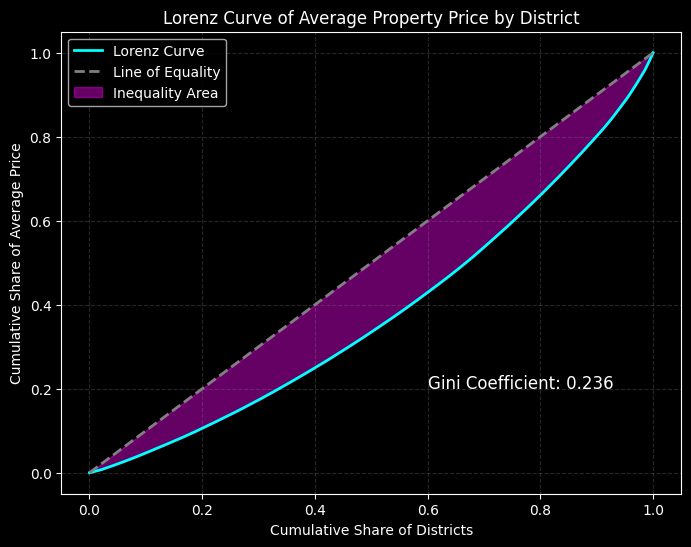

In [3]:
# Group by '18_district' and compute average price
district_avg_price = sale_df.groupby('district')['price'].mean().sort_values()

# Calculate Gini coefficient
def gini(array):
    array = np.sort(array)
    n = array.size
    cumvals = np.cumsum(array)
    gini_coeff = (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n
    return gini_coeff

gini_coeff = gini(district_avg_price.values)

# Plot Lorenz curve
cum_dist = np.cumsum(district_avg_price.values) / district_avg_price.values.sum()
cum_pop = np.arange(1, len(district_avg_price) + 1) / len(district_avg_price)
plt.style.use('dark_background')
plt.figure(figsize=(8,6))
plt.plot(np.insert(cum_pop, 0, 0), np.insert(cum_dist, 0, 0), label='Lorenz Curve', color='cyan', linewidth=2)
plt.plot([0,1], [0,1], '--', color='gray', label='Line of Equality', linewidth=2)

# Fill the area between Lorenz curve and line of equality
plt.fill_between(np.insert(cum_pop, 0, 0), np.insert(cum_dist, 0, 0), np.insert(cum_pop, 0, 0), 
                 color='magenta', alpha=0.4, label='Inequality Area')

plt.title('Lorenz Curve of Average Property Price by District', color='white')
plt.xlabel('Cumulative Share of Districts', color='white')
plt.ylabel('Cumulative Share of Average Price', color='white')
plt.legend()
plt.grid(True, color='gray', linestyle='--', alpha=0.3)
plt.text(0.6, 0.2, f'Gini Coefficient: {gini_coeff:.3f}', fontsize=12, color='white')
plt.show()



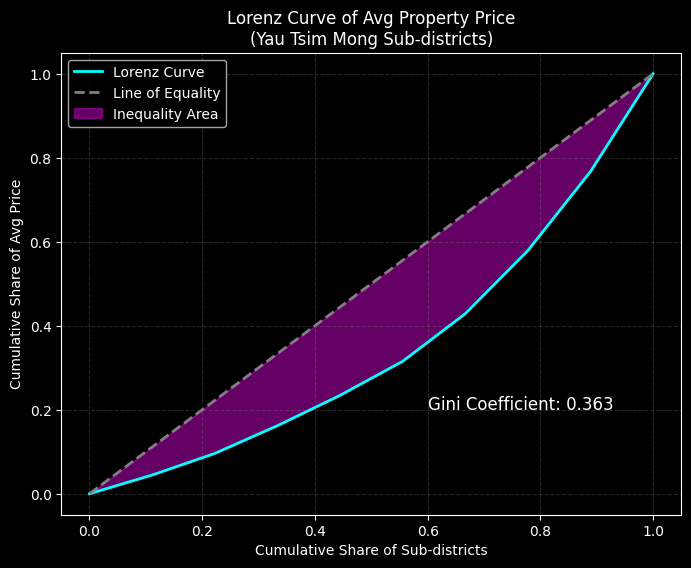

In [30]:
# Find the district in '18_district' with the largest price variation (std)
district_variation = sale_df.groupby('18_district')['price'].std()
target_district = district_variation.idxmax()

# Filter for that district
target_df = sale_df[sale_df['18_district'] == target_district]

# Use all property prices in the target district (no averaging)
subdistrict_prices = target_df['price'].sort_values().values

# Calculate Gini coefficient for all property prices (no averaging)
def gini(array):
    array = np.sort(array)
    n = array.size
    cumvals = np.cumsum(array)
    gini_coeff = (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n
    return gini_coeff

gini_target = gini(subdistrict_prices)

# Lorenz curve for the target district's sub-districts
cum_price = np.cumsum(subdistrict_avg_price.values) / subdistrict_avg_price.values.sum()
cum_pop = np.arange(1, len(subdistrict_avg_price) + 1) / len(subdistrict_avg_price)

plt.style.use('dark_background')
plt.figure(figsize=(8,6))
plt.plot(np.insert(cum_pop, 0, 0), np.insert(cum_price, 0, 0), label='Lorenz Curve', color='cyan', linewidth=2)
plt.plot([0,1], [0,1], '--', color='gray', label='Line of Equality', linewidth=2)
plt.fill_between(np.insert(cum_pop, 0, 0), np.insert(cum_price, 0, 0), np.insert(cum_pop, 0, 0), 
                 color='magenta', alpha=0.4, label='Inequality Area')
plt.title(f'Lorenz Curve of Avg Property Price\n({target_district} Sub-districts)', color='white')
plt.xlabel('Cumulative Share of Sub-districts', color='white')
plt.ylabel('Cumulative Share of Avg Price', color='white')
plt.legend()
plt.grid(True, color='gray', linestyle='--', alpha=0.3)
plt.text(0.6, 0.2, f'Gini Coefficient: {gini_target:.3f}', fontsize=12, color='white')
plt.show()

In [ ]:
# Find the district with the highest Gini coefficient from district_variation
highest_gini_district = district_variation.idxmax()
print(f"District with the highest price variation (std, proxy for Gini): {highest_gini_district}")

# Use all property prices in the target district (no averaging)
subdistrict_prices = target_df['price'].sort_values().values

# Calculate Gini coefficient for all property prices (no averaging)
def gini(array):
    array = np.sort(array)
    n = array.size
    cumvals = np.cumsum(array)
    gini_coeff = (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n
    return gini_coeff

gini_target = gini(subdistrict_prices)

# Lorenz curve for Kai Tak
cum_price = np.cumsum(subdistrict_prices) / subdistrict_prices.sum()
cum_pop = np.arange(1, len(subdistrict_prices) + 1) / len(subdistrict_prices)

plt.style.use('dark_background')
plt.figure(figsize=(8,6))
plt.plot(np.insert(cum_pop, 0, 0), np.insert(cum_price, 0, 0), label='Lorenz Curve', color='cyan', linewidth=2)
plt.plot([0,1], [0,1], '--', color='gray', label='Line of Equality', linewidth=2)
plt.fill_between(np.insert(cum_pop, 0, 0), np.insert(cum_price, 0, 0), np.insert(cum_pop, 0, 0), 
                 color='magenta', alpha=0.4, label='Inequality Area')
plt.title(f'Lorenz Curve of Property Price\n({target_district})', color='white')
plt.xlabel('Cumulative Share of Properties', color='white')
plt.ylabel('Cumulative Share of Price', color='white')
plt.legend()
plt.grid(True, color='gray', linestyle='--', alpha=0.3)
plt.text(0.6, 0.2, f'Gini Coefficient: {gini_target:.3f}', fontsize=12, color='white')
plt.show()


District with the highest price variation (std, proxy for Gini): Yau Tsim Mong


In [33]:
# Show all distinct variables (columns) in Kai Tak district
distinct_districts = sale_df['district'].unique()
print(distinct_districts)


['Wu Kai Sha' 'Tsuen King Circuit' 'Belvedere' 'Ma On Shan' 'Lohas Park'
 'Tseung Kwan O' 'Tsuen Wan West' 'Tai Wai' 'Fo Tan' 'Discovery Park'
 'Ho Man Tin' 'Tsing Yi' 'Ha Kwai Chung' 'Tin Shui Wai'
 'Yuen Long Station' 'Kwun Tong' 'Lam Tin' 'Ma Wan' 'So Kwun Wat'
 'Tuen Mun Town Centre' 'Luk Yeung' 'Tung Chung Town Centre'
 'Yau Yat Tsuen' 'Yau Tong' 'Tuen Mun San Hui' 'Tsing Lung Tau'
 'Tai Hang Mid-Levels' 'Tsuen Wan Town Centre' 'Kam Tin' 'Siu Hong'
 'Mid-Levels West' 'Po Lam' 'Tuen Mun South' 'Tiu Keng Leng'
 'Pak Shek Kok' 'Nam Cheong Station' 'Tuen Mun North' 'Lam Tei'
 'Kowloon Station' 'Sai Ying Pun' 'Mei Foo' 'Wan Chai' 'Hang Hau'
 'Sheung Wan' 'Heng On' 'City One Shatin' 'To Kwa Wan' 'Taikoo Shing'
 'Long Ping' 'Kowloon Bay' 'Olympic Station' 'Sai Wan Ho' 'Chi Lok'
 'Yuen Long Southeast' 'Tuen Mun Ferry Pier' 'Ping Shan'
 'Four Little Dragons' 'North Point' 'Tai Kok Tsui' 'Fanling' 'Mong Kok'
 'Kornhill' 'Wong Tai Sin' 'Cheung Sha Wan' 'Shek Kip Mei' 'Causeway Bay'
 'Shau Ke

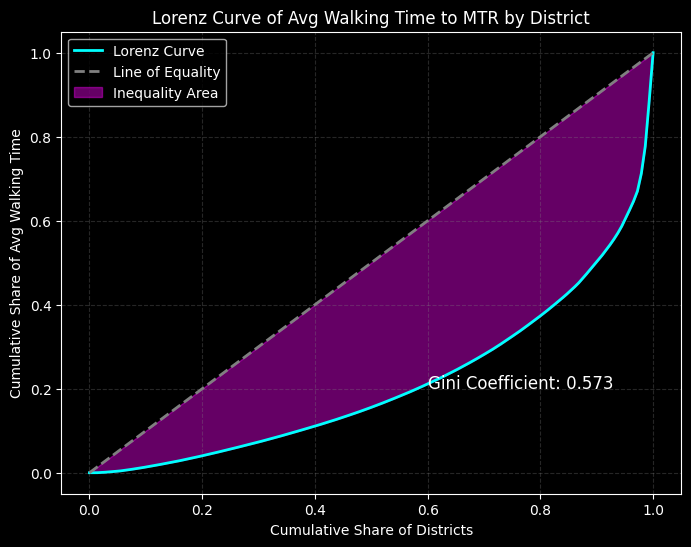

In [36]:
# Group by district and compute average walking time to MTR
district_avg_walking_time = sale_df.groupby('district')['walking_time_to_mtr'].mean().sort_values()

# Gini coefficient function
def gini(array):
    array = np.sort(array)
    n = array.size
    cumvals = np.cumsum(array)
    gini_coeff = (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n
    return gini_coeff

gini_walking_time = gini(district_avg_walking_time.values)

# Lorenz curve for walking time to MTR
cum_walking_time = np.cumsum(district_avg_walking_time.values) / district_avg_walking_time.values.sum()
cum_pop = np.arange(1, len(district_avg_walking_time) + 1) / len(district_avg_walking_time)

plt.style.use('dark_background')
plt.figure(figsize=(8,6))
plt.plot(np.insert(cum_pop, 0, 0), np.insert(cum_walking_time, 0, 0), label='Lorenz Curve', color='cyan', linewidth=2)
plt.plot([0,1], [0,1], '--', color='gray', label='Line of Equality', linewidth=2)
plt.fill_between(np.insert(cum_pop, 0, 0), np.insert(cum_walking_time, 0, 0), np.insert(cum_pop, 0, 0), 
                 color='magenta', alpha=0.4, label='Inequality Area')
plt.title('Lorenz Curve of Avg Walking Time to MTR by District', color='white')
plt.xlabel('Cumulative Share of Districts', color='white')
plt.ylabel('Cumulative Share of Avg Walking Time', color='white')
plt.legend()
plt.grid(True, color='gray', linestyle='--', alpha=0.3)
plt.text(0.6, 0.2, f'Gini Coefficient: {gini_walking_time:.3f}', fontsize=12, color='white')
plt.show()



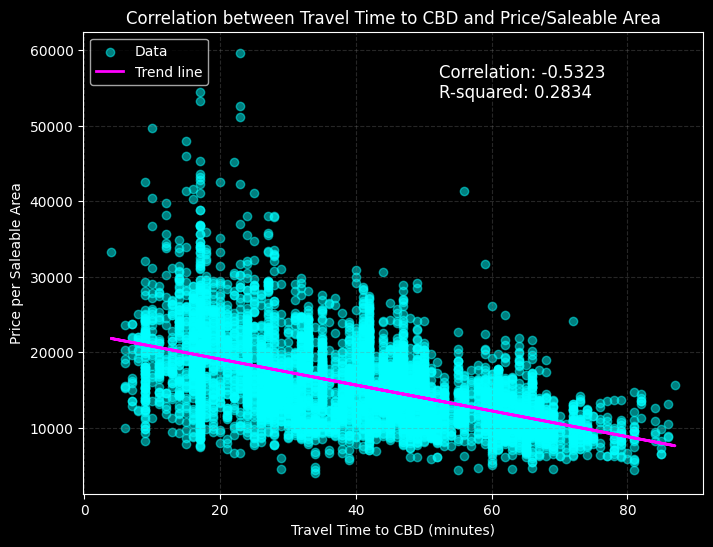

In [4]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression: use travel_time_to_cbd and Price/saleable_area
mask = (~sale_df['travel_time_to_cbd'].isna()) & (~sale_df['Price/saleable_area'].isna())
X = sale_df.loc[mask, 'travel_time_to_cbd'].values.reshape(-1, 1)
y = sale_df.loc[mask, 'Price/saleable_area'].values

# Fit linear regression
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
r_squared = reg.score(X, y)
correlation = np.corrcoef(X.flatten(), y)[0, 1]

plt.style.use('dark_background')
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.5, label='Data', color='cyan')
plt.plot(X, y_pred, color='magenta', linewidth=2, label='Trend line')
plt.xlabel('Travel Time to CBD (minutes)', color='white')
plt.ylabel('Price per Saleable Area', color='white')
plt.title('Correlation between Travel Time to CBD and Price/Saleable Area', color='white')
plt.grid(True, color='gray', linestyle='--', alpha=0.3)
plt.legend()
plt.text(0.6*X.max(), 0.9*y.max(), f'Correlation: {correlation:.4f}\nR-squared: {r_squared:.4f}', color='white', fontsize=12)
plt.show()

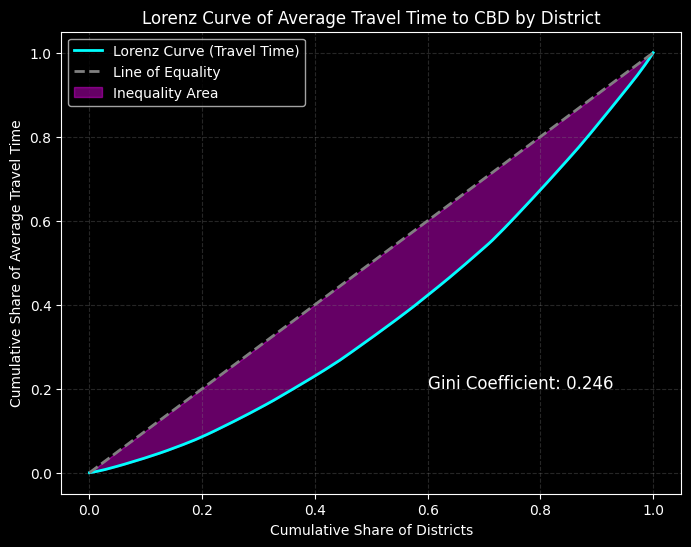

The Gini coefficient for average travel time to CBD across districts is 0.246.
A higher Gini coefficient indicates greater inequality in travel times among districts. Here, the value suggests a moderate level of inequality, meaning some districts have much shorter average travel times to the CBD than others. This spatial inequality can influence property prices, as districts closer to the CBD tend to have higher prices due to better accessibility.


In [5]:
# Group by district and compute average travel time to CBD and average price
district_avg_travel_time = sale_df.groupby('district')['travel_time_to_cbd'].mean().sort_values()
district_avg_price = sale_df.groupby('district')['price'].mean().loc[district_avg_travel_time.index]

# Calculate Gini coefficient for average travel time to CBD
def gini(array):
    array = np.sort(array)
    n = array.size
    cumvals = np.cumsum(array)
    gini_coeff = (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n
    return gini_coeff

gini_travel_time = gini(district_avg_travel_time.values)

# Lorenz curve for travel time to CBD
cum_travel_time = np.cumsum(district_avg_travel_time.values) / district_avg_travel_time.values.sum()
cum_pop = np.arange(1, len(district_avg_travel_time) + 1) / len(district_avg_travel_time)

plt.style.use('dark_background')
plt.figure(figsize=(8,6))
plt.plot(np.insert(cum_pop, 0, 0), np.insert(cum_travel_time, 0, 0), label='Lorenz Curve (Travel Time)', color='cyan', linewidth=2)
plt.plot([0,1], [0,1], '--', color='gray', label='Line of Equality', linewidth=2)
plt.fill_between(np.insert(cum_pop, 0, 0), np.insert(cum_travel_time, 0, 0), np.insert(cum_pop, 0, 0), 
                 color='magenta', alpha=0.4, label='Inequality Area')
plt.title('Lorenz Curve of Average Travel Time to CBD by District', color='white')
plt.xlabel('Cumulative Share of Districts', color='white')
plt.ylabel('Cumulative Share of Average Travel Time', color='white')
plt.legend()
plt.grid(True, color='gray', linestyle='--', alpha=0.3)
plt.text(0.6, 0.2, f'Gini Coefficient: {gini_travel_time:.3f}', fontsize=12, color='white')
plt.show()

# Interpretation
print(f"The Gini coefficient for average travel time to CBD across districts is {gini_travel_time:.3f}.")
print("A higher Gini coefficient indicates greater inequality in travel times among districts. Here, the value suggests a moderate level of inequality, meaning some districts have much shorter average travel times to the CBD than others. This spatial inequality can influence property prices, as districts closer to the CBD tend to have higher prices due to better accessibility.")

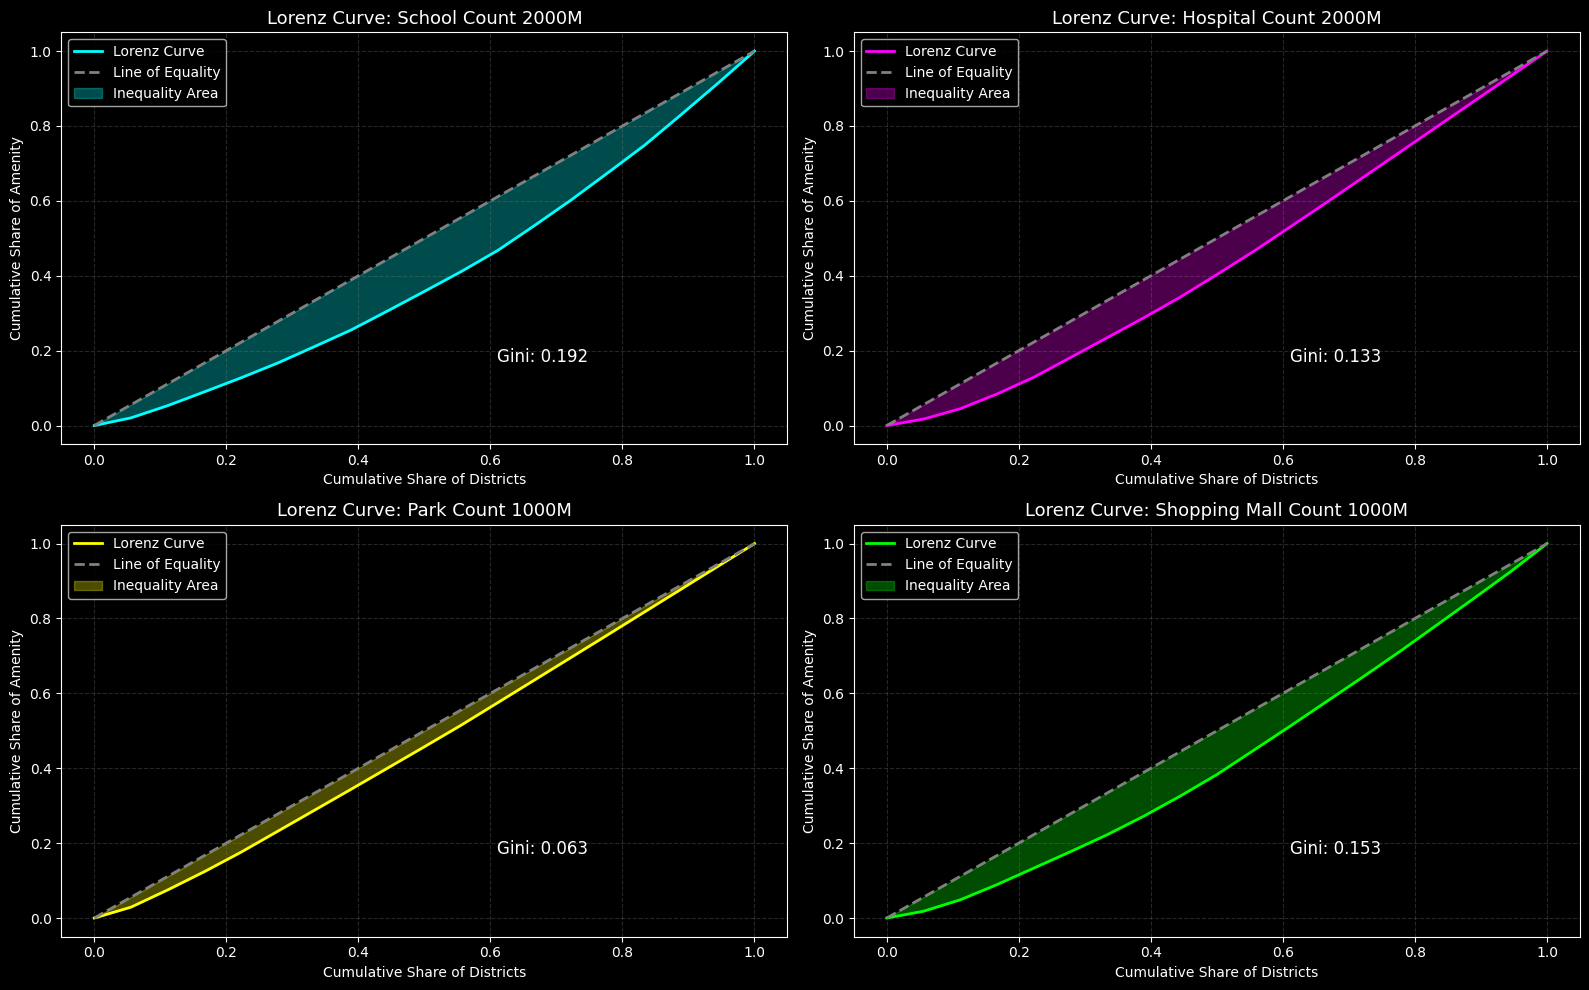

In [8]:
plt.style.use('dark_background')
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
colors = ['cyan', 'magenta', 'yellow', 'lime']

for i, col in enumerate(amenity_cols):
    district_means = sale_df.groupby('18_district')[col].mean().sort_values()
    cum_amenity = np.cumsum(district_means.values) / district_means.values.sum()
    cum_pop = np.arange(1, len(district_means) + 1) / len(district_means)
    gini_val = gini_np(district_means.values)
    ax = axes[i]
    ax.plot(np.insert(cum_pop, 0, 0), np.insert(cum_amenity, 0, 0), label='Lorenz Curve', color=colors[i], linewidth=2)
    ax.plot([0,1], [0,1], '--', color='gray', label='Line of Equality', linewidth=2)
    ax.fill_between(np.insert(cum_pop, 0, 0), np.insert(cum_amenity, 0, 0), np.insert(cum_pop, 0, 0), 
                    color=colors[i], alpha=0.3, label='Inequality Area')
    ax.set_title(f'Lorenz Curve: {col.replace("_", " ").title()}', color='white', fontsize=13)
    ax.set_xlabel('Cumulative Share of Districts', color='white')
    ax.set_ylabel('Cumulative Share of Amenity', color='white')
    ax.legend()
    ax.grid(True, color='gray', linestyle='--', alpha=0.3)
    ax.text(0.6, 0.2, f'Gini: {gini_val:.3f}', fontsize=12, color='white', transform=ax.transAxes)

plt.tight_layout()
plt.show()


In [ ]:
#introduction showing gini value

demog_df = pd.read_csv('../dirtrict_pop/ccgl_demog_data.csv')

demog_df.columns.to_list()

['dc',
 'dc_eng',
 'dc_chi',
 't_pop',
 't_ma',
 'ma_m',
 'ma_f',
 'sr',
 'age_1',
 'age_2',
 'age_3',
 'age_4',
 'nm_m',
 'nm_f',
 'born_hk',
 'born_chi',
 'born_else',
 'ul_can',
 'ul_put_othchi',
 'ul_eng_oth',
 'edu_pri_prepri',
 'edu_sec',
 'edu_ter',
 's_dc',
 's_bus',
 's_mtr',
 's_foot',
 's_sb',
 's_oth',
 't_wp',
 'wp_ee',
 'wp_er',
 'wp_se_fw',
 'wp_a',
 'wp_b',
 'wp_c',
 'wp_d',
 'wp_e',
 'wp_f',
 'wp_g',
 'wp_h',
 'wp_i',
 'mearn_xfw_1',
 'mearn_xfw_2',
 'mearn_xfw_3',
 'mearn_xfdhfw_1',
 'mearn_xfdhfw_2',
 'mearn_xfdhfw_3',
 'whr_1',
 'whr_2',
 'whr_3',
 'whr_xfdh_1',
 'whr_xfdh_2',
 'whr_xfdh_3',
 'wp_dc',
 'wp_bus',
 'wp_mtr',
 'wp_foot',
 'wp_plb',
 'wp_oth',
 't_nwp',
 'nwp_st',
 'nwp_nonstu',
 'dh',
 'dhz_1',
 'dhz_2',
 'dhz_3',
 'adhz',
 'dhc_1',
 'dhc_2',
 'dhc_3',
 'dhi_1',
 'dhi_2',
 'dhi_3',
 'dhi_xfdh_1',
 'dhi_xfdh_2',
 'dhi_xfdh_3',
 'dhn_c',
 'dhn_nc',
 'ma_dhn',
 'oq_qrt_pub',
 'oq_qrt_s',
 'oq_qrt_pri',
 'dh_r1',
 'dh_r3',
 'dh_r4',
 'dh_r5',
 'dh_r0',
 'a

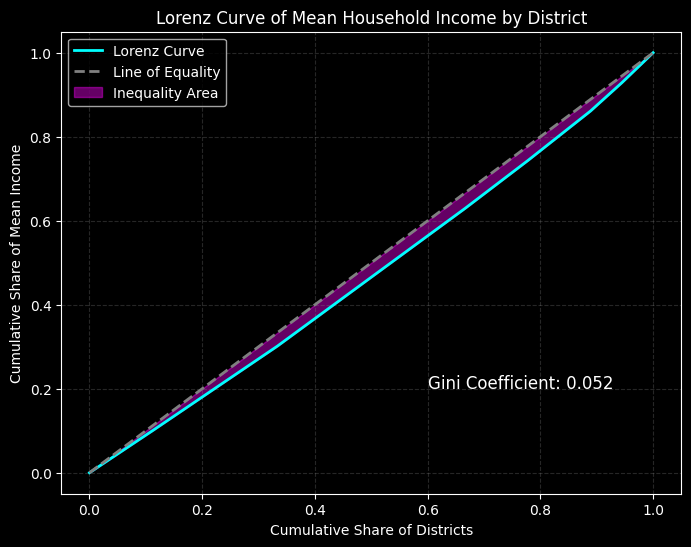

In [ ]:
# Compute mean household income (mearn_xfdh) by district
demog_df['mearn_xfdh'] = demog_df['mearn_xfdhfw_1'].replace(',', '', regex=True).astype(float)
district_income = demog_df.groupby('dc_eng')['mearn_xfdh'].mean().sort_values()

# Gini coefficient function
def gini(array):
    array = np.sort(array)
    n = array.size
    cumvals = np.cumsum(array)
    gini_coeff = (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n
    return gini_coeff

gini_income = gini(district_income.values)

# Lorenz curve
cum_income = np.cumsum(district_income.values) / district_income.values.sum()
cum_pop = np.arange(1, len(district_income) + 1) / len(district_income)

plt.style.use('dark_background')
plt.figure(figsize=(8,6))
plt.plot(np.insert(cum_pop, 0, 0), np.insert(cum_income, 0, 0), label='Lorenz Curve', color='cyan', linewidth=2)
plt.plot([0,1], [0,1], '--', color='gray', label='Line of Equality', linewidth=2)
plt.fill_between(np.insert(cum_pop, 0, 0), np.insert(cum_income, 0, 0), np.insert(cum_pop, 0, 0), 
                 color='magenta', alpha=0.4, label='Inequality Area')
plt.title('Lorenz Curve of Mean Household Income by District', color='white')
plt.xlabel('Cumulative Share of Districts', color='white')
plt.ylabel('Cumulative Share of Mean Income', color='white')
plt.legend()
plt.grid(True, color='gray', linestyle='--', alpha=0.3)
plt.text(0.6, 0.2, f'Gini Coefficient: {gini_income:.3f}', fontsize=12, color='white')
plt.show()


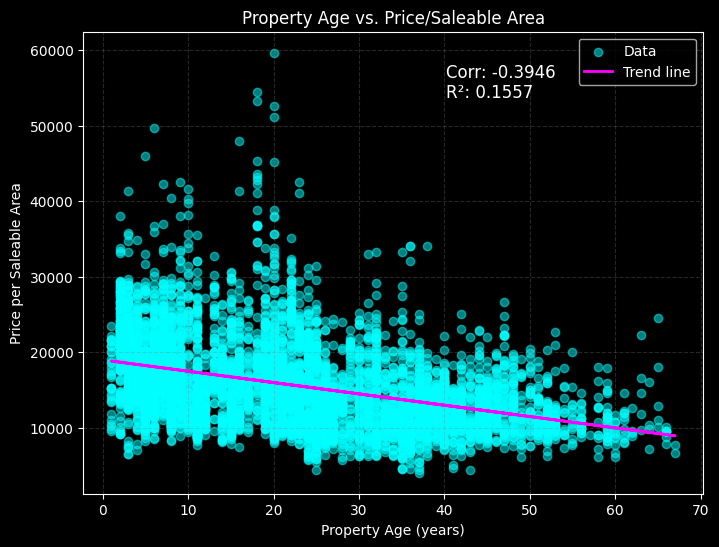

In [17]:
# Scatter plot: property age vs. price/saleable_area with trend line

# Filter out rows with missing values
mask_age = (~sale_df['property_age'].isna()) & (~sale_df['Price/saleable_area'].isna())
X_age = sale_df.loc[mask_age, 'property_age'].values.reshape(-1, 1)
y_price = sale_df.loc[mask_age, 'Price/saleable_area'].values

# Fit linear regression
reg_age = LinearRegression().fit(X_age, y_price)
y_pred_age = reg_age.predict(X_age)
r_squared_age = reg_age.score(X_age, y_price)
correlation_age = np.corrcoef(X_age.flatten(), y_price)[0, 1]

plt.style.use('dark_background')
plt.figure(figsize=(8,6))
plt.scatter(X_age, y_price, alpha=0.5, label='Data', color='cyan')
plt.plot(X_age, y_pred_age, color='magenta', linewidth=2, label='Trend line')
plt.xlabel('Property Age (years)', color='white')
plt.ylabel('Price per Saleable Area', color='white')
plt.title('Property Age vs. Price/Saleable Area', color='white')
plt.grid(True, color='gray', linestyle='--', alpha=0.3)
plt.legend()
plt.text(0.6*X_age.max(), 0.9*y_price.max(), f'Corr: {correlation_age:.4f}\nR²: {r_squared_age:.4f}', color='white', fontsize=12)
plt.show()